# 4.1 인공 신경망의 한계와 딥러닝 출현

입력이 두 개 있는 상황 가정

### AND 게이트

모든 입력이 '1'일 때 작동  
입력 중 하나라도 '0'을 갖는다면 작동 x

### OR 게이트

입력 중 적어도 한 개가 '1'일 때 작동  
모든 입력이 '0'이면 작동 x

### XOR 게이트

입력 두 개 중 한 개만 '1'일 때 작동  
모든 입력이 '0'이거나, 모든 입력이 '1'이면 작동 x  
- 데이터가 비선형적으로 분리되기 때문에 단층 퍼셉트론으로는 학습 불가능  
  &rightarrow; 다층 퍼셉트론 고안

심층 신경망(= 딥러닝) : 입력층과 출력층 사이에 은닉층이 여러 개 있는 신경망

# 4.2 딥러닝 구조

## 4.2.1 딥러닝 용어

### 가중치

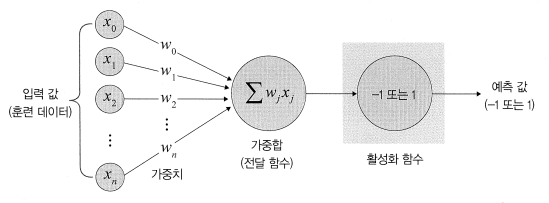

노드와 노드 간 연결 강도

입력 값이 연산 결과에 미치는 영향력을 조절하는 요소

### 가중합(전달 함수)

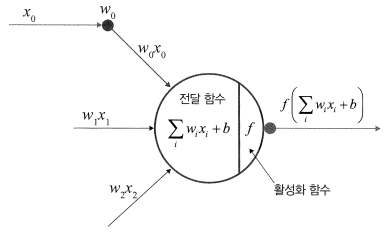

각 노드에서 들어오는 신호에 가중치를 곱한 값들을 모두 더한 것

$ \sum_{i} w_{i} x_{i} + b $

### 활성화 함수

전달 함수에서 전달받은 값을 출력할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수

#### **시그모이드 함수**

선형 함수의 결과를 0~1 사이에서 비선형 형태로 변형해 줌

딥러닝 모델의 깊이가 깊어지면 기울기가 사라지는 기울기 소멸 문제가 발생하여 딥러닝 모델에서는 잘 사용하지 않음

$ f(x) = \frac{1}{1+e^{-x}} $


#### **하이퍼볼릭 탄젠트 함수**

선형 함수의 결과를 -1~1 사이에서 비선형 형태로 변형해 줌

기울기 소멸 문제 존재

#### **렐루 함수**

입력이 음수일 때는 0을 출력하고, 양수일 때는 입력값을 출력

경사 하강법에 영향을 주지 않아 학습 속도가 빠르고, 기울기 소멸 문제가 발생하지 않음

일반적으로 은닉층에서 사용

음수 값을 받으면 항상 0을 출력하기 때문에 학습 능력 감소 &rightarrow; 리키 렐루 함수 사용

In [ ]:
def forward(self, x) :
  ...
  x = self.relu(x)
  ...
  return x

#### **리키 렐루 함수**

입력 값이 음수이면 0 대신 0.001처럼 매우 작은 값 출력

#### **소프트맥스 함수**

입력 값을 0~1 사이에 출력되도록 정규화하여, 출력 값들의 합이 항상 1이 되도록 함

출력 노드의 활성화 함수로 많이 사용

$ y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n} exp(a_{i})} $

In [ ]:
def forward(self, x) :
  ...
  x = self.softmax(x)
  ...
  return x

### 손실 함수

학습을 통해 얻은 데이터의 추정치가 실제 데이터와 얼마나 차이가 나는지 평가하는 지표

#### **평균 제곱 오차(MSE)**

주로 회귀에서 손실 함수로 사용

실제 값과 예측 값의 차이를 제곱하여 평균을 낸 것

$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} $

In [ ]:
import torch

loss_fn = torch.nn.MSELoss(reduction = 'sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)

#### **크로스 엔트로피 오차**

분류에서 원-핫 인코딩을 했을 때만 사용할 수 있음

경사 하강법 과정에서 학습이 지역 최소점에서 멈추는 것을 방지하기 위해 모델의 출력값에 자연 로그를 취함

$ CorssEntropy = -\sum_{i=1}^{n} y_{i} log{\hat y_{i}} $

In [ ]:
loss = nn.CorssEntropyLoss()
input = torch.randn(5, 6, requires_grad = True)
target = torch.empty(3, dtype = torch.long).random_(5)
output = loss(input, target)
output.backward()

## 4.2.2 딥러닝 학습


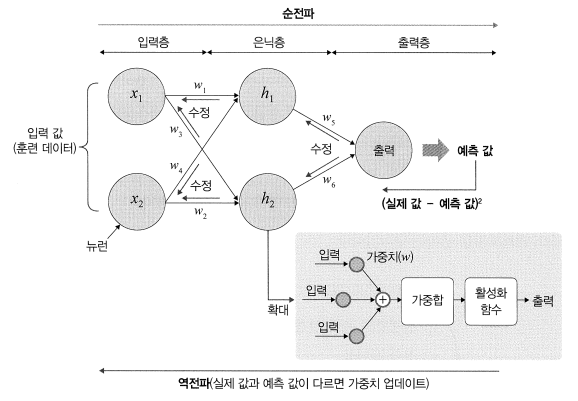

## 4.2.3 딥러닝의 문제점과 해결 방안

활성화 함수가 적용된 은닉층 개수가 많을 수록 데이터 분류가 잘 됨

그러나 문제점도 존재

### 과적합 문제 발생

훈련 데이터에 대해 과하게 학습해서 실제 데이터에 대한 오차가 증가하는 현상

드롭아웃(dropout)으로 해결  
: 학습 과정 중 임의로 일부 노드들을 학습에서 제외시키는 것

In [ ]:
class DropoutModel(torch.nn.Module) :
  def __init__(self) :
    super(DropoutModel, self).__init__()
    self.layer1 = troch.nn.Linear(784, 1200)
    self.dropout1 = torch.nn.Dropout(0.5)    # 50%의 노드를 학습에서 제외시키겠다는 의미
    self.layer2 = torch.nn.Linear(1200, 1200)
    self.dropout2 = torch.nn.Dropout(0.5)
    self.layer3 = torch.nn.Linear(1200, 10)

  def forward(self, x) :
    x = F.relu(self.layer1(x))
    x = self.dropout1(x)
    x = F.relu(self.layer2(x))
    x = self.dropout2(x)
    return self.layer3(x)

### 기울기 소멸 문제 발생

은닉층이 많은 신경망에서 주로 발생

출력층에서 은닉층으로 전달되는 오차가 크게 줄어들어 학습이 되지 않는 현상

기울기 소멸 &rightarrow; 학습되는 양이 0에 가까워져 학습이 더디게 진행됨 &rightarrow; 오차를 더 줄이지 못하고 그 상태로 수렴

활성화 함수로 렐루를 사용하면 해결 가능

### 성능이 나빠지는 문제 발생

경사 하강법 과정에서 성능이 나빠지는 문제 발생

확률적 경사 하강법과 미니 배치 경사 하강법을 사용하여 개선

#### 배치 경사 하강법(BGD)

전체 데이터셋에 대한 error를 구한 후 기울기를 한 번만 계산하여 모델의 파라미터를 업데이트  
(전체 훈련 데이터셋에 대해 가중치를 편미분)

$ W = W - a \bigtriangledown J(W, b) $  
$ a : 학습률, J : 손실 함수, \bigtriangledown : 기울기 $

단점 : 한 스텝에 모든 훈련 데이터셋을 사용하므로 학습이 오래 걸림

#### 확률적 경사 하강법(SGD)

임의로 선택한 데이터에 대해 기울기를 계산  
(적은 데이터를 사용하므로 빠른 계산 가능)

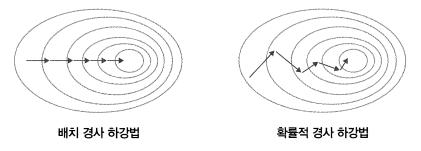

#### 미니 배치 경사 하강법

전체 데이터셋을 미니 배치(mini-batch) 여러 개로 나누고,  
미니 배치 한 개마다 기울기를 구한 후 그것의 펴균 기울기를 이용하여 모델을 업데이트하여 학습하는 방법

BGD보다 빠르고, SGD보다 안정적이기 때문에 많이 사용됨

In [ ]:
class CustomDataset(Dataset) :
  def __init__(self) :
    self.x_data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    self.y_data = [[12], [18], [11]]
    def __len__(self) :
      return len(self.x_data)
    def __getitem__(self, idx) :
      x = torch.FloatTensor(self.x_data[idx])
      y = torch.FloatTensor(self.y_data[idx])
      return x, y

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(
    dataset,
    batch_size = 2,    # 미니 배치 크기로 2의 제곱수를 사용하겠다는 의미
    shuffle = True
)

# 4.3 딥러닝 알고리즘

## 4.3.1 심층 신경망(DNN)

입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망

장점 : 비선형적 관계를 학습할 수 있음

단점 : 학습을 위한 연산량이 많고, 기울기 소멸 문제 등이 발생할 수 있음  
&nbsp;&nbsp; &rightarrow; 드롭아웃, 렐루 함수, 배치 정규화 등 적용

## 4.3.2 합성곱 신경망(CNN)

합성곱층과 풀링층을 포함하는 인공 신경망 알고리즘(이미지 처리 성능 good)

## 4.3.3 순환 신경망(RNN)

시계열 데이터처럼 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망

자연어 처리 분야에서 주로 사용

단점 : 기울기 소멸 문제 발생 가능  
&nbsp;&nbsp;  &rightarrow; 메모리 개념을 도입한 LSTM 사용

## 4.3.4 제한된 볼츠만 머신

가시층과 은닉층으로 구성된 모델

가시층 간, 은닉층 간의 연결 없이, 가시층-은닉층 간의 연결만 존재

## 4.3.5 심층 신뢰 신경망

사전 훈련된 제한된 볼츠만 머신을 층층이 쌓아 올린 구조

레이블이 없는 데이터에 대한 비지도 학습 가능